In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [14]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with =engine)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
recent_date = max(session.query(Measurement.date).all())
recent_date

('2017-08-23',)

In [47]:
session.query(Measurement.date).all()

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [33]:
most_recent_date= datetime.strptime(recent_date[0], '%Y-%m-%d').date()


In [34]:
most_recent_date

datetime.date(2017, 8, 23)

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = most_recent_date - relativedelta(months=12)
year_ago

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
data = session.query(*sel).filter(func.strftime("%Y-%m-%d", Measurement.date) > year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

data_df = pd.DataFrame(data, columns=['date', 'prcp'])
data_df['date']= pd.to_datetime(data_df['date'])
#data_df.info()
# Sort the dataframe by date
sorted_data_df = data_df.sort_values(by=['date'])
sorted_data_df




date  prcp
0    2016-08-24  0.08
1006 2016-08-24   NaN
1524 2016-08-24  2.15
702  2016-08-24  2.28
360  2016-08-24  2.15
...         ...   ...
1522 2017-08-22  0.00
1523 2017-08-23  0.08
359  2017-08-23  0.00
1005 2017-08-23  0.00
2222 2017-08-23  0.45

[2223 rows x 2 columns]

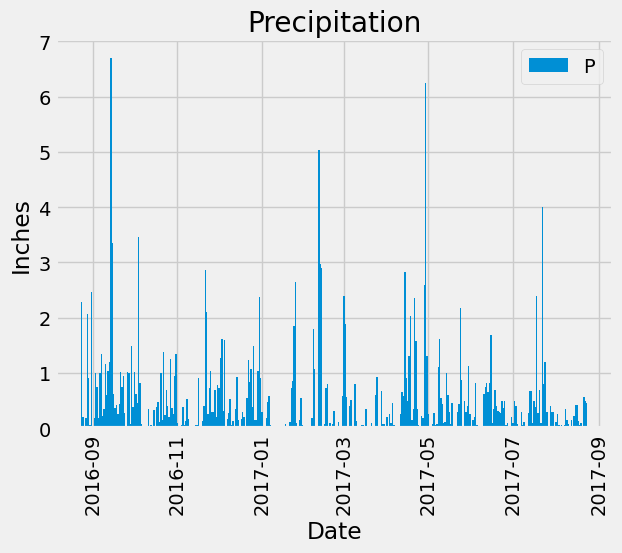

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(sorted_data_df['date'], sorted_data_df['prcp'], width = 1)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation")
plt.legend("Precipitation")
plt.show()

In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_data_df[['prcp']].describe()

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(func.count(Station.station)).scalar()
number_stations

9

In [81]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#stations = session.query(Station.station).all()

sel = [Measurement.station,func.count(Measurement.date)]
stations_activity = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.date)).all()
stations_activity

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)
      ]
station_USC00519281 = session.query(*sel).group_by(Measurement.station).filter(Measurement.station == 'USC00519281').all()
station_USC00519281

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

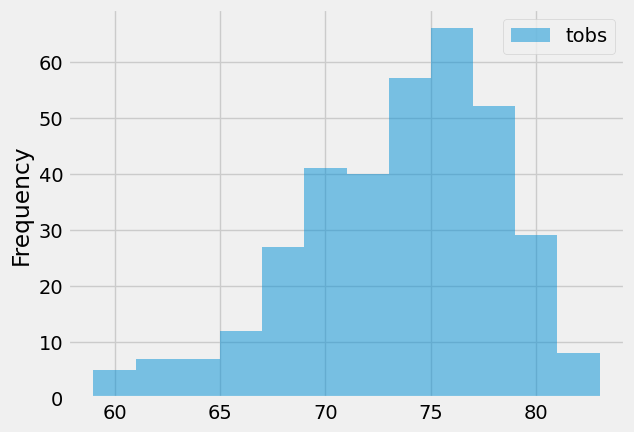

In [84]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.tobs]
data_temp = session.query(*sel).filter(func.strftime("%Y-%m-%d", Measurement.date) > year_ago).filter(Measurement.station == 'USC00519281').all()
data_temp_df = pd.DataFrame(data_temp, columns=['tobs'])
ax = data_temp_df.plot.hist(bins=12, alpha=0.5)


# Close session

In [85]:
# Close Session
session.close()